In [2]:
from __future__ import division, print_function
from tensorflow.python.keras.layers.core import Dense
from tensorflow.python.keras.layers import Dense,BatchNormalization
from tensorflow.python.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import math
import os
import matplotlib.pyplot as plt


In [3]:
data = np.load('/home/chase/Boyka/Lyu/fac_cond256_unit8.npz')
raw_X=data['cond']
raw_X=np.squeeze(raw_X)
raw_Y=data['fac']
raw_Y=raw_Y.astype(np.float64)
NUM_TIMESTEPS = 65
BATCH_SIZE = 256   
NUM_EPOCHS = 100
Xtrain=raw_X[:-1000]
Ytrain=raw_Y[:-1000]
Xtest=raw_X[-1000:]
Ytest=raw_Y[-1000:]


In [4]:
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(2000, 65) (1000, 65) (2000, 3) (1000, 3)


In [5]:
model = Sequential()
model.add(Dense(64,activation= 'relu',input_shape=(65,)))
model.add(Dense(128,activation= 'relu'))
model.add(Dense(256,activation= 'relu'))
model.add(Dense(100,activation= 'relu'))
model.add(Dense(3))
model.summary()

model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4224      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 303       
Total params: 71,571
Trainable params: 71,571
Non-trainable params: 0
_________________________________________________________________


In [6]:
history=model.fit(Xtrain, Ytrain, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(Xtest, Ytest),shuffle=True)
score, _ = model.evaluate(Xtest, Ytest, batch_size=BATCH_SIZE)
rmse = math.sqrt(score)
model.save('fc.h5')
 

Epoch 1/100
8/8 [==============================] - 1s 20ms/step - loss: 1.0209 - mean_squared_error: 1.0209 - val_loss: 0.5820 - val_mean_squared_error: 0.5820
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.5147 - mean_squared_error: 0.5147 - val_loss: 0.4851 - val_mean_squared_error: 0.4851
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4867 - mean_squared_error: 0.4867 - val_loss: 0.4583 - val_mean_squared_error: 0.4583
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 0.4678 - mean_squared_error: 0.4678 - val_loss: 0.4600 - val_mean_squared_error: 0.4600
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.4612 - mean_squared_error: 0.4612 - val_loss: 0.4599 - val_mean_squared_error: 0.4599
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.4597 - mean_squared_error: 0.4597 - val_loss: 0.4580 - val_mean_squared_error: 0.4580
Epoch 7/100
8/8 [============================

In [7]:
print("\nMSE: {:.3f}, RMSE: {:.3f}".format(score, rmse))
print(history.history.keys())
mean_squared_error = history.history['mean_squared_error']
val_mean_squared_error = history.history['val_mean_squared_error']


MSE: 0.406, RMSE: 0.637
dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


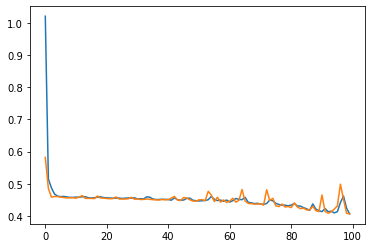

In [8]:
ax = plt.figure().add_subplot()
ax.plot(range(len(mean_squared_error)),mean_squared_error,label='train')
ax.plot(range(len(mean_squared_error)),val_mean_squared_error,label='val')

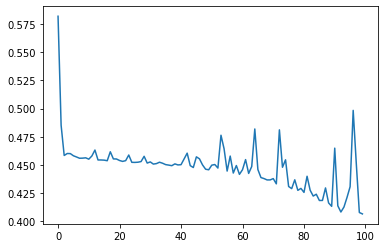

In [9]:
ax = plt.figure().add_subplot()
ax.plot(range(len(mean_squared_error)),val_mean_squared_error,label='val')

In [10]:
pre = model.predict(Xtest, batch_size=BATCH_SIZE)
print(pre)

[[2.7507198  0.8479226  0.00350286]
 [3.1613238  0.81006664 0.01518465]
 [2.8999453  0.83656836 0.01021455]
 ...
 [3.3541274  0.79818773 0.02678491]
 [3.28239    0.8260466  0.02368034]
 [3.0192657  0.8678285  0.02173344]]


In [12]:
pre.shape

(1000, 3)

In [15]:
ae=np.maximum(pre-Ytest,Ytest-pre)
mae0=np.mean(ae[:,0])
mae1=np.mean(ae[:,1])
mae2=np.mean(ae[:,2])
mse0 = math.sqrt(mae0)
mse1 = math.sqrt(mae1)
mse2 = math.sqrt(mae2)
print("\nMAE0: {:.3f}, MAE1: {:.3f}, MAE2: {:.3f},".format(mae0, mae1,mae2))
print("\nMSE0: {:.3f}, MSE1: {:.3f}, MSE2: {:.3f},".format(mse0, mse1,mse2))



MAE0: 0.710, MAE1: 0.002, MAE2: 0.003,

MSE0: 0.843, MSE1: 0.050, MSE2: 0.059,


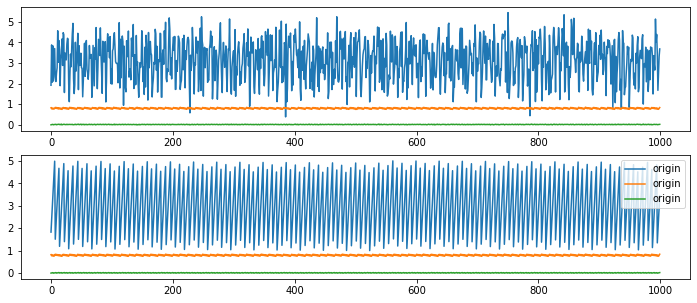

In [16]:
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.plot(pre,label='predctions')
plt.subplot(212)
plt.plot(Ytest,label='origin')
plt.legend()
plt.show()

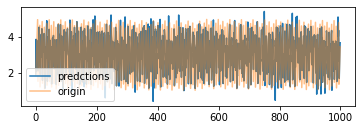

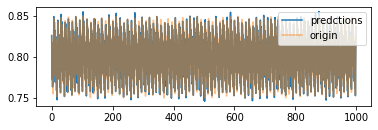

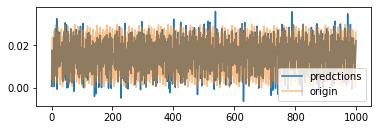

In [17]:
plt.figure(1)
plt.subplot(211)
plt.plot(pre[:,0],label='predctions',alpha=1)
plt.plot(Ytest[:,0],label='origin',alpha=0.5)
plt.legend(['predctions','origin'])

plt.figure(2)
plt.subplot(211)
plt.plot(pre[:,1],label='predctions',alpha=1)
plt.plot(Ytest[:,1],label='origin',alpha=0.5)
plt.legend()

plt.figure(3)
plt.subplot(211)
plt.plot(pre[:,2],label='predctions',alpha=1)
plt.plot(Ytest[:,2],label='origin',alpha=0.5)
plt.legend()
plt.show()

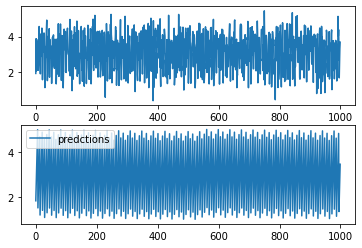

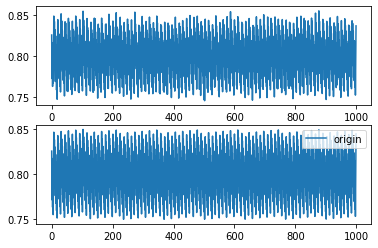

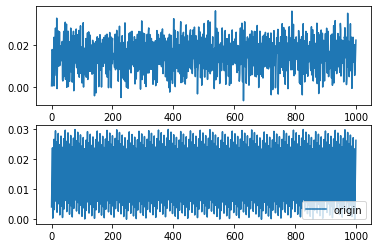

In [18]:
plt.figure(1)
plt.subplot(211)
plt.plot(pre[:,0],label='predctions')
plt.subplot(212)
plt.plot(Ytest[:,0],label='origin')
plt.legend(['predctions','origin'])

plt.figure(2)
plt.subplot(211)
plt.plot(pre[:,1],label='predctions')
plt.subplot(212)
plt.plot(Ytest[:,1],label='origin')
plt.legend()

plt.figure(3)
plt.subplot(211)
plt.plot(pre[:,2],label='predctions')
plt.subplot(212)
plt.plot(Ytest[:,2],label='origin')
plt.legend()
plt.show()